Crea una regresión lineal con los demás inputs numericos

'housing_median_age', 'total_rooms',
'total_bedrooms', 'population', 'households'

- Realiza un analisis bivariado de cada uno de estos
- Escribe la ecuación del modelo 
- Obtener R2 y mean squared error
- Grafica las predicciones 

Responde la pregunta: ¿Cuál es el mejor modelo de estos? ¿Por qué?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('housing.csv')

In [6]:
df = df[df.median_house_value!= df.median_house_value.max()]

In [7]:
y = df['median_house_value']

# Total Bedrooms

In [9]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)

In [10]:
df['total_bedrooms_bin']= pd.qcut(df['total_bedrooms'], q = 10, labels = False) +1

In [11]:
grouped_bedrooms = df.groupby('total_bedrooms_bin').mean()

/var/folders/hp/74fh93z51nbgcfx2dccxw8w80000gn/T/ipykernel_77623/1950910203.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_bedrooms = df.groupby('total_bedrooms_bin').mean()


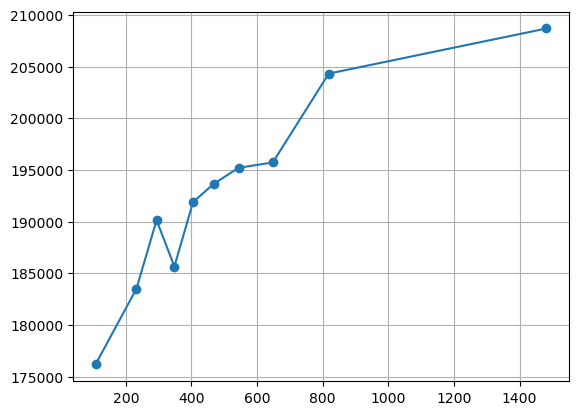

In [12]:
plt.plot(grouped_bedrooms.total_bedrooms.values, grouped_bedrooms.median_house_value.values, marker = "o")
plt.grid()

En la grafica podemos notar que aunque existe un crecimiento lineal este no es lineal, lo que hace este a un mal modelo debido a que no existe una relación lineal entre la cantidad de dormitorios que tiene una casa y el valor de esta.

In [14]:
# Total Bedroooms
X = df[['total_bedrooms']]
model= linear_model.LinearRegression().fit(X, y)
print("r2:",r2_score(y_true=y, y_pred=model.predict(X)))
print("MSE:",mean_squared_error(y_true=df.median_house_value,
                   y_pred=model.predict(X)))
print(model.intercept_,model.coef_)

r2: 0.005365082732013637
MSE: 9495833114.733957
183455.69921142812 [16.89048081]


Casa = 183455 + 16 * Total Bedrooms

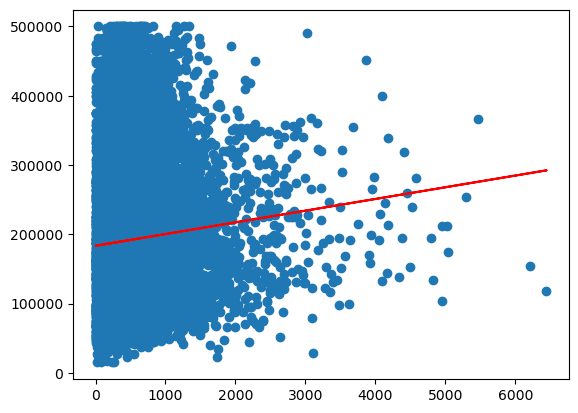

In [16]:
plt.scatter(df['total_bedrooms'],df['median_house_value'])
plt.plot(X, model.predict(X), color = "red")

# Housing Median Age

In [18]:
df['housing_median_age_bin']= pd.qcut(df['housing_median_age'], q = 10, labels = False) +1

In [19]:
grouped_age = df.groupby('housing_median_age_bin').mean()

/var/folders/hp/74fh93z51nbgcfx2dccxw8w80000gn/T/ipykernel_77623/3846150960.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_age = df.groupby('housing_median_age_bin').mean()


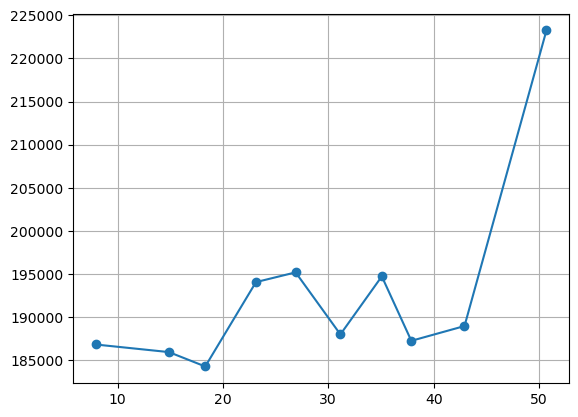

In [20]:
plt.plot(grouped_age.housing_median_age.values, grouped_age.median_house_value.values, marker = "o")
plt.grid()

En esta gráfica podemos ver que no existe crecimiento, esta sube y baja, aunque entre el noveno y decimo punto podemos notar un crecimiento grande en la linea, claramente está gráfica no es linea, este de igual manera es un mal modelo y la relación lineal entre la edad de una casa y su valor es inexistente.

In [22]:
# Housing Median Age
X = df[['housing_median_age']]
model= linear_model.LinearRegression().fit(X, y)
print("r2:",r2_score(y_true=y, y_pred=model.predict(X)))
print("MSE:",mean_squared_error(y_true=df.median_house_value,
                   y_pred=model.predict(X)))
print(model.intercept_,model.coef_)

r2: 0.004616870761556036
MSE: 9502976334.705992
177411.79806093415 [530.7537496]


Casa = 177411 + 530 * Housing Median Age

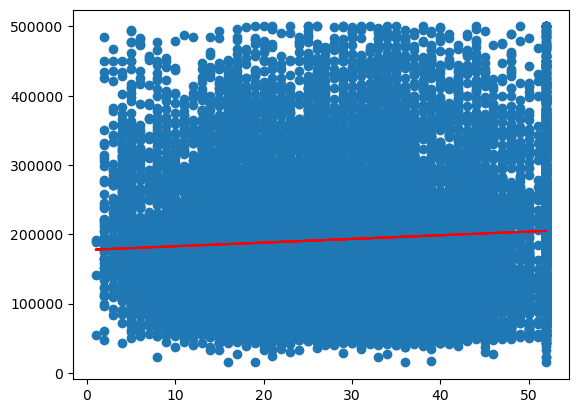

In [24]:
plt.scatter(df['housing_median_age'],df['median_house_value'])
plt.plot(X, model.predict(X), color = "red")

# Households

In [26]:
df['households_bin']= pd.qcut(df['households'], q = 10, labels = False) +1

In [27]:
grouped_households = df.groupby('households_bin').mean()

/var/folders/hp/74fh93z51nbgcfx2dccxw8w80000gn/T/ipykernel_77623/1124618410.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_households = df.groupby('households_bin').mean()


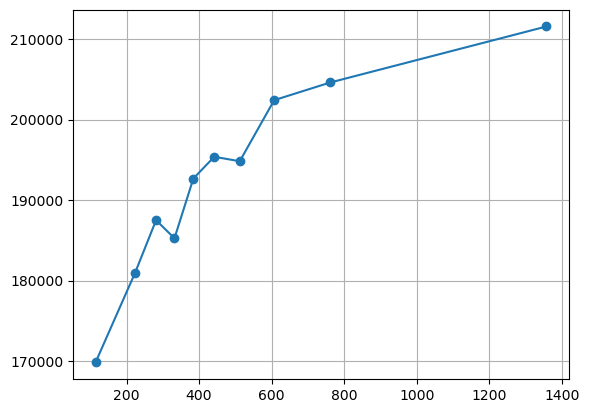

In [28]:
plt.plot(grouped_households.households.values, grouped_households.median_house_value.values, marker = "o")
plt.grid()

En esta gráfica podemos notar un crecimiento exponencial aunque de cierta manera este no es para nada lineal, este de igual manera es un mal modelo ya que no existe una relación lineal entre el numero de familias y el valor de una casa

In [30]:
# Households
X = df[['households']]
model= linear_model.LinearRegression().fit(X, y)
print("r2:",r2_score(y_true=y, y_pred=model.predict(X)))
print("MSE:",mean_squared_error(y_true=df.median_house_value,
                   y_pred=model.predict(X)))
print(model.intercept_,model.coef_)

r2: 0.009004884338978392
MSE: 9461083732.794487
180352.83033455737 [24.19279495]


Casa = 180352 + 24 * Households

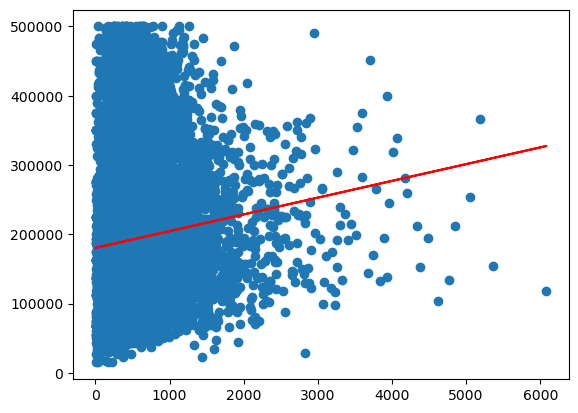

In [32]:
plt.scatter(df['households'],df['median_house_value'])
plt.plot(X, model.predict(X), color = "red")

# Population

In [34]:
df['population_bin']= pd.qcut(df['population'], q = 10, labels = False) +1

In [35]:
grouped_population = df.groupby('population_bin').mean()

/var/folders/hp/74fh93z51nbgcfx2dccxw8w80000gn/T/ipykernel_77623/1182594609.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_population = df.groupby('population_bin').mean()


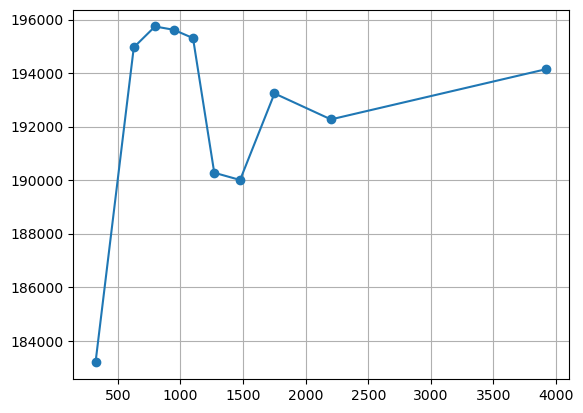

In [36]:
plt.plot(grouped_population.population.values, grouped_population.median_house_value.values, marker = "o")
plt.grid()

Esta gráfica es bastante extraña porque al principio hay un crecimiento exponencial bastante alto y despúes empieza a bajar y subir, claramente no existe una relación lineal entre la población y el valor de una casa

In [38]:
# Population
X = df[['population']]
model= linear_model.LinearRegression().fit(X, y)
print("r2:",r2_score(y_true=y, y_pred=model.predict(X)))
print("MSE:",mean_squared_error(y_true=df.median_house_value,
                   y_pred=model.predict(X)))
print(model.intercept_,model.coef_)

r2: 0.00014314747840926678
MSE: 9545687211.793383
191005.0921058971 [1.02222129]


Casa = 191005 + 1.02 * population

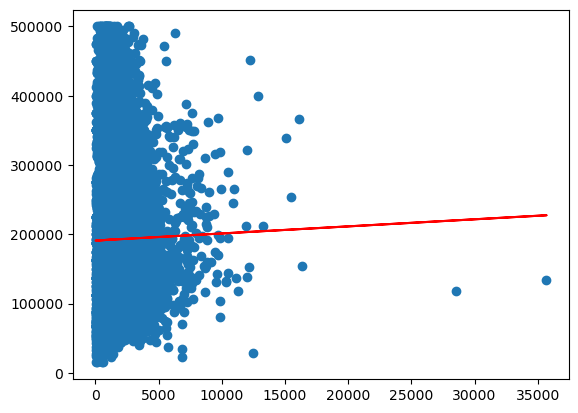

In [40]:
plt.scatter(df['population'],df['median_house_value'])
plt.plot(X, model.predict(X), color = "red")

# Total Rooms

In [42]:
df['total_rooms_bin']= pd.qcut(df['total_rooms'], q = 10, labels = False) +1

In [43]:
grouped_rooms = df.groupby('total_rooms_bin').mean()

/var/folders/hp/74fh93z51nbgcfx2dccxw8w80000gn/T/ipykernel_77623/1891106140.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_rooms = df.groupby('total_rooms_bin').mean()


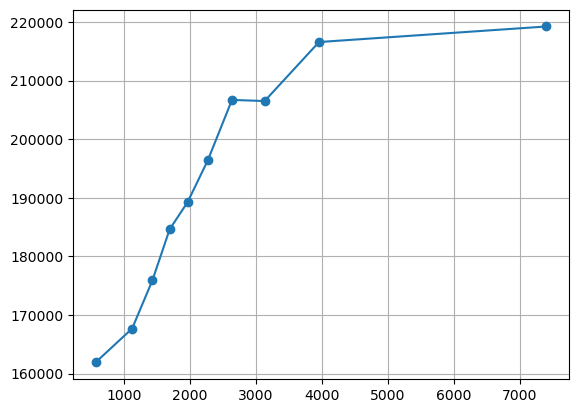

In [44]:
plt.plot(grouped_rooms.total_rooms.values, grouped_rooms.median_house_value.values, marker = "o")
plt.grid()

En la gráfica notamos que esta va siempre en crecimiento, es cierto que del septimo al octavo punto la linea se podría decir que se estanca o que tiene los mismos datos de y, pero a pesar de que sea creciente no quiere decir que sea lineal, de igual manera este es un mal modelo, no existe una relación lineal entre el total de habitaciones con el precio de una casa

In [46]:
# Total Rooms
X = df[['total_rooms']]
model= linear_model.LinearRegression().fit(X, y)
print("r2:",r2_score(y_true=y, y_pred=model.predict(X)))
print("MSE:",mean_squared_error(y_true=df.median_house_value,
                   y_pred=model.predict(X)))
print(model.intercept_,model.coef_)

r2: 0.020488694351853853
MSE: 9351447180.215874
175680.60158723383 [6.411769]


Casa = 175680 + 6 * Total Rooms

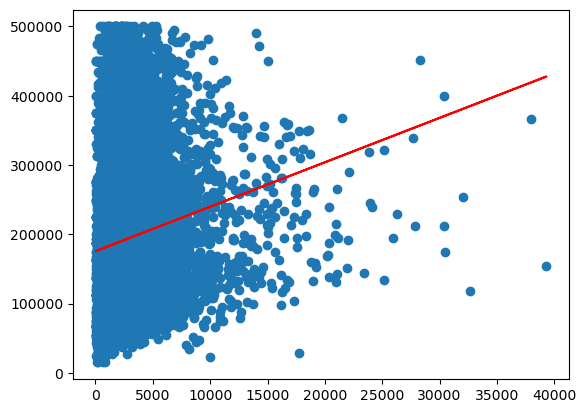

In [48]:
plt.scatter(df['total_rooms'],df['median_house_value'])
plt.plot(X, model.predict(X), color = "red")

# Median Income

In [49]:
df['median_income_bin']= pd.qcut(df['median_income'], q = 10, labels = False) +1

In [88]:
grouped_income = df.groupby('median_income_bin').mean()

/var/folders/hp/74fh93z51nbgcfx2dccxw8w80000gn/T/ipykernel_77623/1393739199.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_income = df.groupby('median_income_bin').mean()


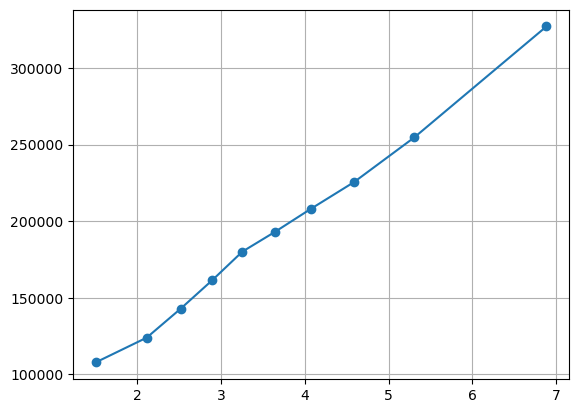

In [90]:
plt.plot(grouped_income.median_income.values, grouped_income.median_house_value.values, marker = "o")
plt.grid()

Aunque ciertamente esta grafica no es completamente lineal podemos notar un crecimiento que se le asemeja, este es el mejor modelo que hay de todos los que se han calculado y por mucho.

In [92]:
# Median Income
X = df[['median_income']]
model= linear_model.LinearRegression().fit(X, y)
print("r2:",r2_score(y_true=y, y_pred=model.predict(X)))
print("MSE:",mean_squared_error(y_true=df.median_house_value,
                   y_pred=model.predict(X)))
print(model.intercept_,model.coef_)

r2: 0.41294861985820197
MSE: 5604611138.037092
45456.9967823177 [39987.01206232]


Casa = 45456 + 39987*MedianIncome

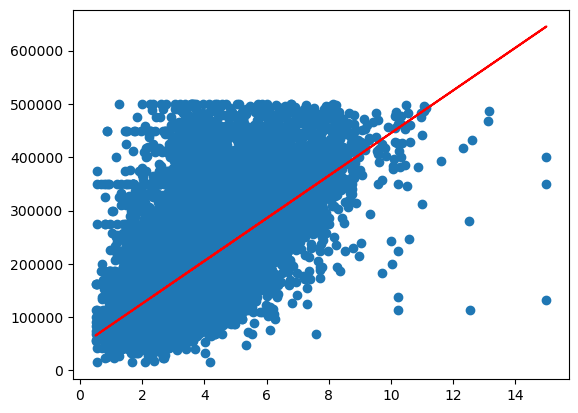

In [96]:
plt.scatter(df['median_income'],df['median_house_value'])
plt.plot(X, model.predict(X), color = "red")

# Conclusion 


En cuanto al mejor modelo entre estos seria el de median income, debido a que este es el que tiene el mayor numero de r2 con un 0.4129, es decir que este modelo explica el 41.29% de la variabilidad de los datos de los precios de las casas con respecto al ingreso promedio de una persona, comparado con el siguiente mejor modelo que es el de total rooms con solo un 0.02 de R2, haciendo la diferencia de casi 40% entre un modelo y el otro.